## Imports

In [2]:
#import required libraries
#nltk for sentinment analysis
import pandas as pd
import matplotlib.pyplot as plt
import tradingview_ta as tv
from tradingview_ta import TA_Handler, Interval, Exchange

import os
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import json
import warnings
warnings.filterwarnings('ignore')
from pandas.io.json import json_normalize
import warnings
warnings.filterwarnings('ignore')

#Tokenizing function libraries to import including the tokenizer and lemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from string import punctuation
import re

from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Tradingview Rec

In [3]:
symbol_tv = TA_Handler(
    symbol="TSLA",
    screener="america",
    exchange="NASDAQ",
    interval=Interval.INTERVAL_1_HOUR,
    # proxies={'http': 'http://example.com:8080'} # Uncomment to enable proxy (replace the URL).
)
print(symbol_tv.get_analysis().summary)

{'RECOMMENDATION': 'SELL', 'BUY': 2, 'SELL': 16, 'NEUTRAL': 8}


## News API


In [ ]:
value = input("Enter Stock Symbol:")

In [44]:
# Read api key environment variable
from newsapi.newsapi_client import NewsApiClient
load_dotenv()
api_key = os.getenv('NEWSAPI_KEY')

In [45]:
api_key

'da1e9a6806334ef58648fbb684ba57df'

In [46]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [47]:
# Fetch the Stock news articles
stock_headlines = newsapi.get_everything(q=value,
                                        language="en",
                                        page_size=100,
                                        sort_by='relevancy')
#save json
with open('stock.json', 'w') as json_file:
   json.dump(stock_headlines, json_file)

In [48]:
# Create the Stock sentiment scores DataFrame
tc = pd.read_json ('stock.json')
#parse the json and load into a dataframe
df_stocknews = json_normalize(stock_headlines['articles'])
#drop all columns except for description
df_stocknews = df_stocknews.drop(['author', 'title', 'url','urlToImage','publishedAt','content','source.id','source.name'], axis=1)
#instantiate vader sentiment 
sentiment_title = df_stocknews.apply(lambda x : analyzer.polarity_scores(x['description']), axis=1)
#add a column for each sentimement metric
df_stocknews['Comp'] =sentiment_title.apply(lambda x : x.get('compound') )
df_stocknews['Pos'] =sentiment_title.apply(lambda x : x.get('pos') )
df_stocknews['Neu'] =sentiment_title.apply(lambda x : x.get('neu') )
df_stocknews['Neg'] =sentiment_title.apply(lambda x : x.get('neg') )
display(df_stocknews)

df_sentiment = df_stocknews['Comp'].sum()

display(df_sentiment)


,description,Comp,Pos,Neu,Neg
0,Amazon founder Jeff Bezos recently warned cons...,-0.5719,0.050,0.762,0.188
1,"Tesla Inc <a href=""https://www.reuters.com/com...",-0.1027,0.082,0.821,0.097
2,TSLA earnings call for the period ending Septe...,0.0000,0.000,1.000,0.000
3,The price of meme coin Dogecoin has rose over ...,0.0000,0.000,1.000,0.000
4,Elon Musk recently floated the possibility of ...,0.4215,0.092,0.867,0.040
...,...,...,...,...,...
95,"After listening to Tesla's earnings call, ther...",0.0000,0.000,1.000,0.000
96,Tesla might have done well in the last few yea...,0.1406,0.075,0.925,0.000
97,Both these stocks have put up great returns fo...,0.7003,0.279,0.721,0.000
98,Sometimes the answer is right in front of you.,0.0000,0.000,1.000,0.000


10.993899999999998

In [49]:
df_stocknews.to_csv(r'Headlines.csv', index = False)

In [50]:
# Describe the stock Sentiment
df_stocknews.describe()

,Comp,Pos,Neu,Neg
count,100.000000,100.000000,100.000000,100.000000
mean,0.109939,0.088570,0.861230,0.050210
std,0.394639,0.107959,0.126285,0.087143
min,-0.855500,0.000000,0.556000,0.000000
25%,0.000000,0.000000,0.761000,0.000000
50%,0.000000,0.049500,0.864000,0.000000
75%,0.440400,0.164250,1.000000,0.075750
max,0.844200,0.387000,1.000000,0.444000


In [51]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

#takes out all common words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
# Complete the tokenizer function which removes the stopwords and the punctuation and keeps the relevant words
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [53]:
# Create a new tokens column for the stock
df_stocknews['tokens'] = df_stocknews.apply(lambda x : tokenizer(x['description']), axis=1)
df_stocknews

,description,Comp,Pos,Neu,Neg,tokens
0,Amazon founder Jeff Bezos recently warned cons...,-0.5719,0.050,0.762,0.188,"amazon, founder, jeff, bezos, recently, warned..."
1,"Tesla Inc <a href=""https://www.reuters.com/com...",-0.1027,0.082,0.821,0.097,"tesla, inc, hrefhttpswwwreuterscomcompaniestsl..."
2,TSLA earnings call for the period ending Septe...,0.0000,0.000,1.000,0.000,"tsla, earnings, call, period, ending, september"
3,The price of meme coin Dogecoin has rose over ...,0.0000,0.000,1.000,0.000,"price, meme, coin, dogecoin, rose, october, ac..."
4,Elon Musk recently floated the possibility of ...,0.4215,0.092,0.867,0.040,"elon, muskrecently, floated, possibility, some..."
...,...,...,...,...,...,...
95,"After listening to Tesla's earnings call, ther...",0.0000,0.000,1.000,0.000,"listening, tesla, earnings, call, reason, bull..."
96,Tesla might have done well in the last few yea...,0.1406,0.075,0.925,0.000,"tesla, might, done, well, last, year, investor..."
97,Both these stocks have put up great returns fo...,0.7003,0.279,0.721,0.000,"stock, put, great, return, shareholder, future..."
98,Sometimes the answer is right in front of you.,0.0000,0.000,1.000,0.000,"sometimes, answer, right, front"


In [54]:
#libraries needed for counting the frequencies of words and phrases germane to the chosen topic
from collections import Counter
from nltk import ngrams
import nltk, re, string, collections
from collections import Counter
from nltk import ngrams
from nltk.collocations import *
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# Generate the stock N-grams where N=2
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
#determine counts in the token column
sparse_matrix = word_vectorizer.fit_transform(df_stocknews['tokens'])
#sum counts
frequencies = sum(sparse_matrix).toarray()[0]
#create dataframe with ngram and count
df_stock_freq_2 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df_stock_freq_2 = df_stock_freq_2.sort_values(by='frequency', ascending=False)
df_stock_freq_2.head(10)

,frequency
elon musk,25
tesla inc,8
tesla stock,5
electric vehicle,5
nasdaq tsla,5
tesla tsla,5
inc nasdaq,5
tesla share,4
ceo elon,4
tesla earnings,4


In [56]:
#Wordcloud libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [57]:
#join all text in tokens column into 1 string
corpus_stock = df_stocknews['tokens'].str.cat(sep=', ')

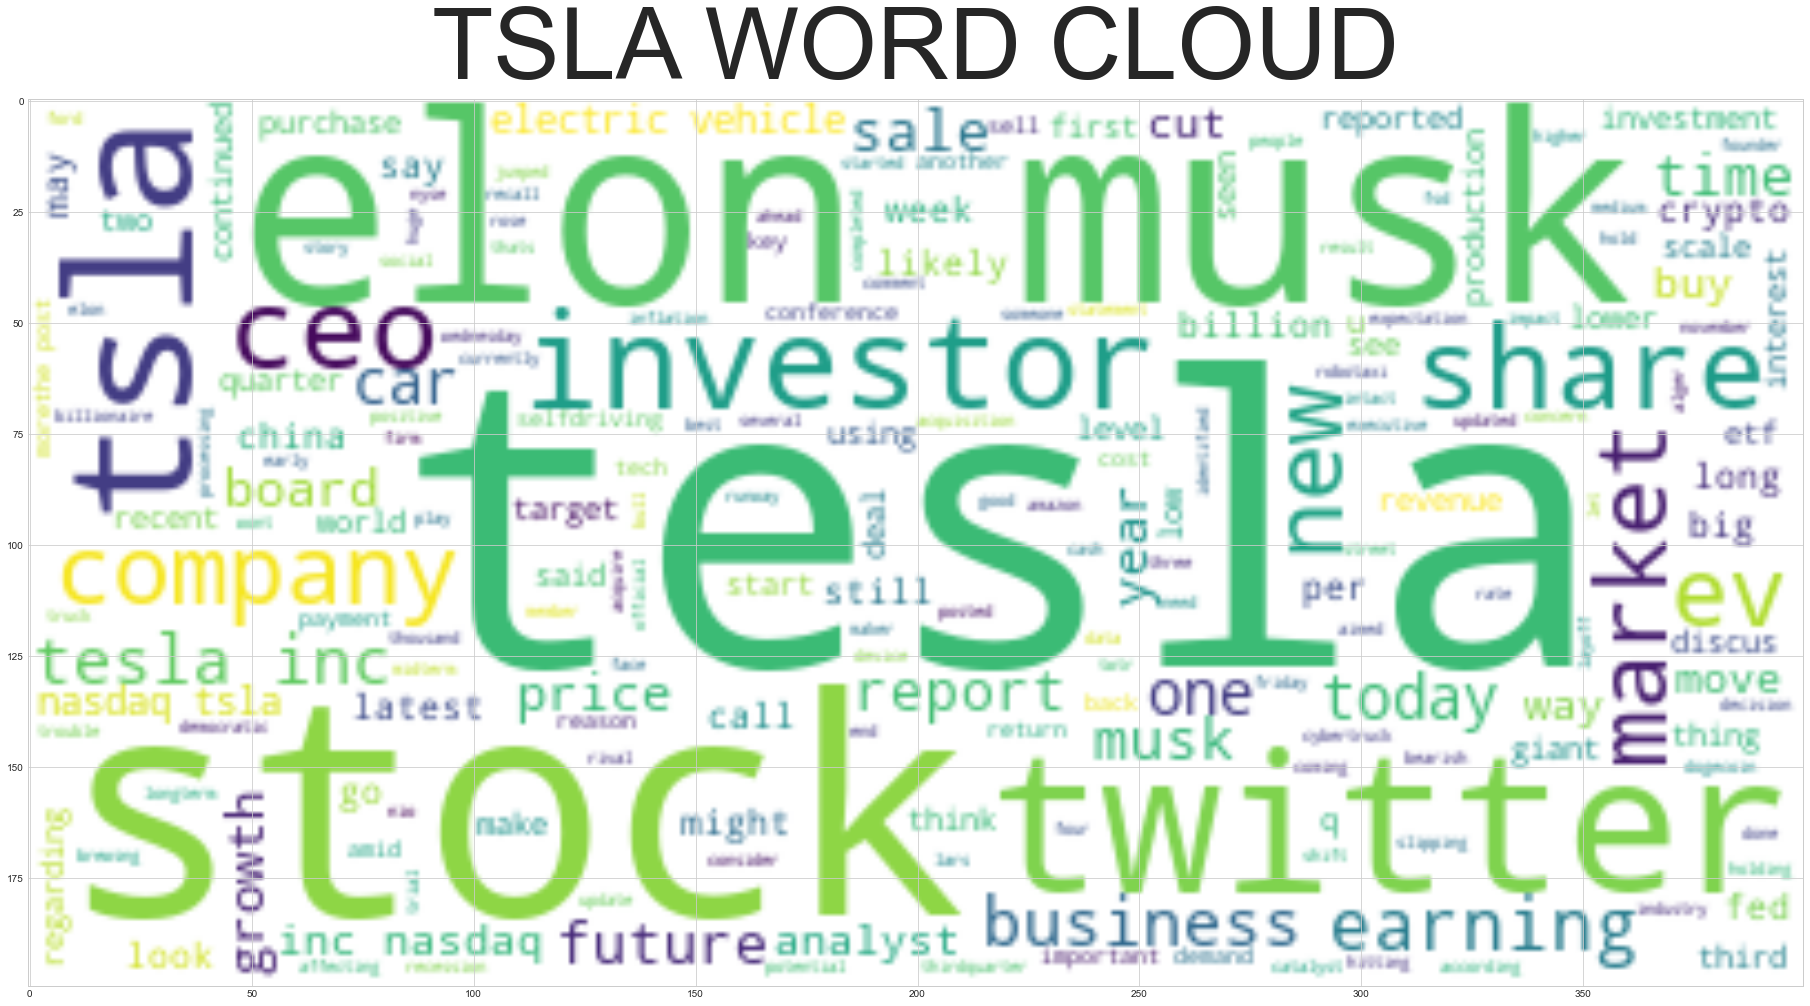

In [58]:
# Generate the stock word cloud
#create word cloud
wc = WordCloud(background_color="white", max_words=200)
wc.generate(corpus_stock)
f = plt.figure(figsize=(70,70))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title(f"{value} WORD CLOUD",fontsize=100)
plt.show()


In [60]:
f.savefig("Wordcloud.png", bbox_inches='tight', dpi=150)
